## Eigenvectors and Eigenvalues
### Use numpy only
#### Find eigenvalues and eigenvevtors of the following:

$$\begin{bmatrix} 1&0 \\ 0&2 \end{bmatrix}$$
$$\begin{bmatrix} 1&2 \\ 3&-4 \end{bmatrix}$$

In [2]:
import numpy as np

In [3]:
m1 = np.array([[1, 0], [0, 2]])
m2 = np.array([[1, 2], [3, -4]])

In [4]:
eigenvalues_m1, eigenvectors_m1 = np.linalg.eig(m1)

In [8]:
print("Eigenvalues:", eigenvalues_m1)

Eigenvalues: [1. 2.]


In [9]:
print("Eigenvectors:")
print(eigenvectors_m1)

Eigenvectors:
[[1. 0.]
 [0. 1.]]


Eig Values:
 [1. 2.] 
Eig Vectors:
 [[1. 0.]
 [0. 1.]]


{1: 1, 2: 1}

[(1,
  1,
  [Matrix([
   [1],
   [0]])]),
 (2,
  1,
  [Matrix([
   [0],
   [1]])])]

array([1., 2.])

In [10]:
eigenvalues_m2, eigenvectors_m2 = np.linalg.eig(m2)

In [11]:
print("Eigenvalues:", eigenvalues_m2)

Eigenvalues: [ 2. -5.]


In [12]:
print("Eigenvectors:")
print(eigenvectors_m2)

Eigenvectors:
[[ 0.89442719 -0.31622777]
 [ 0.4472136   0.9486833 ]]


Eig Values:
 [ 2. -5.] 
Eig Vectors:
 [[ 0.89442719 -0.31622777]
 [ 0.4472136   0.9486833 ]]


[(2,
  1,
  [Matrix([
   [1],
   [0]])]),
 (3,
  1,
  [Matrix([
   [3],
   [1]])])]

{3: 1, 2: 1}

array([1., 2.])

array([[1., 0.],
       [0., 1.]])

# PCA Using Eigen Decomposition

### Create a matrix contains the following data

In [13]:
data = np.array([
    [1, 2, 3, 4],
    [5, 5, 6, 7],
    [1, 4, 2, 3],
    [5, 3, 2, 1],
    [8, 1, 2, 2]
])

In [14]:
data

array([[1, 2, 3, 4],
       [5, 5, 6, 7],
       [1, 4, 2, 3],
       [5, 3, 2, 1],
       [8, 1, 2, 2]])

array([[1, 2, 3, 4],
       [5, 5, 6, 7],
       [1, 4, 2, 3],
       [5, 3, 2, 1],
       [8, 1, 2, 2]])

### Step 1: Standardize the dataset (Subtract mean and divide by standard deviation).

In [16]:
mean_values = np.mean(data, axis=0)
mean_values

array([4. , 3. , 3. , 3.4])

In [17]:
std_dev_values = np.std(data, axis=0)
standardized_data = (data - mean_values) / std_dev_values
print("Standardized Data:")
print(standardized_data)

Standardized Data:
[[-1.11803399 -0.70710678  0.          0.29138576]
 [ 0.372678    1.41421356  1.93649167  1.74831455]
 [-1.11803399  0.70710678 -0.64549722 -0.19425717]
 [ 0.372678    0.         -0.64549722 -1.16554303]
 [ 1.49071198 -1.41421356 -0.64549722 -0.6799001 ]]


Standardized data:
[[-1.11803399 -0.70710678  0.          0.29138576]
 [ 0.372678    1.41421356  1.93649167  1.74831455]
 [-1.11803399  0.70710678 -0.64549722 -0.19425717]
 [ 0.372678    0.         -0.64549722 -1.16554303]
 [ 1.49071198 -1.41421356 -0.64549722 -0.6799001 ]]


### Step 2: Calculate the covariance matrix for the features in the dataset.
#### Use the formula (X.T@X) / n then confirm using np.cov()

In [20]:
covariance_formula = (standardized_data.T @ standardized_data) / standardized_data.shape[0]

In [21]:
covariance_formula

array([[ 1.        , -0.31622777,  0.04811252, -0.18098843],
       [-0.31622777,  1.        ,  0.63900965,  0.61812254],
       [ 0.04811252,  0.63900965,  1.        ,  0.94044349],
       [-0.18098843,  0.61812254,  0.94044349,  1.        ]])

Using the formula:
[[ 1.         -0.31622777  0.04811252 -0.18098843]
 [-0.31622777  1.          0.63900965  0.61812254]
 [ 0.04811252  0.63900965  1.          0.94044349]
 [-0.18098843  0.61812254  0.94044349  1.        ]]


In [24]:
covariance_cov = np.cov(standardized_data,rowvar=False)
covariance_cov

array([[ 1.25      , -0.39528471,  0.06014065, -0.22623554],
       [-0.39528471,  1.25      ,  0.79876206,  0.77265317],
       [ 0.06014065,  0.79876206,  1.25      ,  1.17555437],
       [-0.22623554,  0.77265317,  1.17555437,  1.25      ]])

Using np.cov():
[[ 1.         -0.31622777  0.04811252 -0.18098843]
 [-0.31622777  1.          0.63900965  0.61812254]
 [ 0.04811252  0.63900965  1.          0.94044349]
 [-0.18098843  0.61812254  0.94044349  1.        ]]


### Step 3: Calculate the eigenvalues and eigenvectors for the covariance matrix.
### Step 4: Sort eigenvalues and their corresponding eigenvectors.

In [26]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_formula)

In [28]:
print("Eigenvalues:")
print(eigenvalues)

print("Eigenvectors:")
print(eigenvectors)

Eigenvalues:
[2.51579324 1.0652885  0.39388704 0.02503121]
Eigenvectors:
[[ 0.16195986 -0.91705888 -0.30707099  0.19616173]
 [-0.52404813  0.20692161 -0.81731886  0.12061043]
 [-0.58589647 -0.3205394   0.1882497  -0.72009851]
 [-0.59654663 -0.11593512  0.44973251  0.65454704]]


Eigen Values:
[2.51579324 1.0652885  0.39388704 0.02503121]


Eigen Vectors:
[[ 0.16195986 -0.91705888 -0.30707099  0.19616173]
 [-0.52404813  0.20692161 -0.81731886  0.12061043]
 [-0.58589647 -0.3205394   0.1882497  -0.72009851]
 [-0.59654663 -0.11593512  0.44973251  0.65454704]]


### Step 5: Pick k eigenvalues and form a matrix of eigenvectors.

#### Select the first 2 eigen vectors

In [31]:
two_eigenvectors = eigenvectors[:, :2]

In [32]:
two_eigenvectors

array([[ 0.16195986, -0.91705888],
       [-0.52404813,  0.20692161],
       [-0.58589647, -0.3205394 ],
       [-0.59654663, -0.11593512]])

array([[ 0.16195986, -0.91705888],
       [-0.52404813,  0.20692161],
       [-0.58589647, -0.3205394 ],
       [-0.59654663, -0.11593512]])

### Step 6:Transform the original matrix.

In [36]:
transformed_matrix = standardized_data.dot(two_eigenvectors)
transformed_matrix

array([[ 1.56561741e-02,  8.45205482e-01],
       [-2.85829190e+00, -8.72549250e-01],
       [-5.75566043e-02,  1.40104719e+00],
       [ 1.13385419e+00,  2.66995807e-04],
       [ 1.76633814e+00, -1.37397042e+00]])

Transformed Data:
[[ 0.01565617  0.84520548]
 [-2.8582919  -0.87254925]
 [-0.0575566   1.40104719]
 [ 1.13385419  0.000267  ]
 [ 1.76633814 -1.37397042]]


### How much is the explained variance by the first two PCs?

In [51]:
explained_variance_ratio = eigenvalues[:2] / np.sum(eigenvalues)
explained_variance_percentage = explained_variance_ratio * 100
print(f'Explained Variance { explained_variance_percentage[0]+explained_variance_percentage[1]}')

Explained Variance 89.52704360795221


Explained Variance: 89.53 %


## SVD
### Repeat using SVD and compare the results

In [54]:
U, S, V = np.linalg.svd(standardized_data, full_matrices=False)

In [130]:
V.T

array([[ 0.16195986, -0.91705888, -0.30707099,  0.19616173],
       [-0.52404813,  0.20692161, -0.81731886,  0.12061043],
       [-0.58589647, -0.3205394 ,  0.1882497 , -0.72009851],
       [-0.59654663, -0.11593512,  0.44973251,  0.65454704]])

V:
[[ 0.16195986 -0.91705888 -0.30707099  0.19616173]
 [-0.52404813  0.20692161 -0.81731886  0.12061043]
 [-0.58589647 -0.3205394   0.1882497  -0.72009851]
 [-0.59654663 -0.11593512  0.44973251  0.65454704]]


In [56]:
S

array([3.54668383, 2.30790869, 1.40336568, 0.35377402])

Singular Values:
[3.54668383 2.30790869 1.40336568 0.35377402]


In [53]:
U

array([[ 4.41431344e-03,  3.66221370e-01,  7.49835326e-01,
        -3.21884149e-01],
       [-8.05905470e-01, -3.78069225e-01, -8.51411283e-02,
        -1.81940451e-02],
       [-1.62282873e-02,  6.07063528e-01, -3.16021938e-01,
         5.75621968e-01],
       [ 3.19694183e-01,  1.15687336e-04, -5.41652025e-01,
        -6.35931364e-01],
       [ 4.98025260e-01, -5.95331360e-01,  1.92979765e-01,
         4.00387590e-01]])

U:
[[ 0.00441431  0.36622137  0.74983533 -0.32188415  0.4472136 ]
 [-0.80590547 -0.37806923 -0.08514113 -0.01819405  0.4472136 ]
 [-0.01622829  0.60706353 -0.31602194  0.57562197  0.4472136 ]
 [ 0.31969418  0.00011569 -0.54165203 -0.63593136  0.4472136 ]
 [ 0.49802526 -0.59533136  0.19297977  0.40038759  0.4472136 ]]


array([[ 0.01565617,  0.84520548,  1.05229316, -0.11387425],
       [-2.8582919 , -0.87254925, -0.11948414, -0.00643658],
       [-0.0575566 ,  1.40104719, -0.44349434,  0.2036401 ],
       [ 1.13385419,  0.000267  , -0.76013586, -0.224976  ],
       [ 1.76633814, -1.37397042,  0.27082118,  0.14164673]])

In [57]:
selected_singular_vectors = Vt[:2, :].T
selected_singular_vectors

array([[ 0.16195986, -0.91705888],
       [-0.52404813,  0.20692161],
       [-0.58589647, -0.3205394 ],
       [-0.59654663, -0.11593512]])

array([[ 0.01565617,  0.84520548],
       [-2.8582919 , -0.87254925],
       [-0.0575566 ,  1.40104719],
       [ 1.13385419,  0.000267  ],
       [ 1.76633814, -1.37397042]])

In [58]:
transformed_matrix_svd = standardized_data.dot(selected_singular_vectors)
transformed_matrix_svd

array([[ 1.56561741e-02,  8.45205482e-01],
       [-2.85829190e+00, -8.72549250e-01],
       [-5.75566043e-02,  1.40104719e+00],
       [ 1.13385419e+00,  2.66995807e-04],
       [ 1.76633814e+00, -1.37397042e+00]])

Transformed Data:
[[ 0.01565617  0.84520548]
 [-2.8582919  -0.87254925]
 [-0.0575566   1.40104719]
 [ 1.13385419  0.000267  ]
 [ 1.76633814 -1.37397042]]


## Apply the SVD on images
- We will use the SVD to extract the more important features from the image
- Let’s start by loading an image in python and convert it to a Numpy array. We will convert it to grayscale to have one dimension per pixel. The shape of the matrix corresponds to the dimension of the image filled with intensity values: 1 cell per pixel.

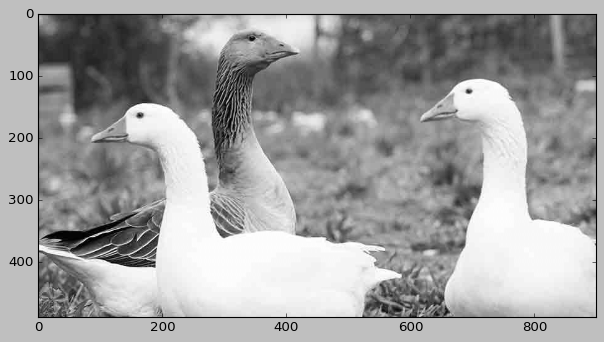

In [59]:
import matplotlib.pyplot as plt
from PIL import Image

plt.style.use('classic')
img = Image.open('goose.jpg')
# convert image to grayscale
imggray = img.convert('LA')
# convert to numpy array
imgmat = np.array(list(imggray.getdata(band=0)), float)
# Reshape according to orginal image dimensions
imgmat.shape = (imggray.size[1], imggray.size[0])

plt.figure(figsize=(9, 6))
plt.imshow(imgmat, cmap='gray')
plt.show()

### Find SVD for the image data matrix (imgmat) and check the shape of the matrices (imgmat, U, D, and V.T)

In [62]:
imgmat.shape = (imggray.size[1], imggray.size[0])
print("Image matrix shape:", imgmat.shape)

Image matrix shape: (488, 900)


Image matrix shape:
(488, 900)


In [64]:
U, D, Vt = np.linalg.svd(imgmat)

In [66]:
print("U matrix shape", U.shape)

U matrix shape (488, 488)


U matrix shape:
(488, 488)


In [67]:
print("D matrix shape:", D.shape)

D matrix shape: (488,)


D matrix shape:
(488,)


In [68]:
print("V.T matrix shape:", Vt.shape)

V.T matrix shape: (900, 900)


V.T matrix shape:
(900, 900)


### Remember:
#### D contains the singular values that need to be put into a diagonal matrix. 
#### Principal components can be obtained from U columns and V.T rows.

#### The singular vectors and singular values are ordered with the first ones corresponding to the more variance explained. For this reason, using just the first few singular vectors and singular values will provide the reconstruction of the principal elements of the image.

### Reconstruct the image from the first 2 principal components

In [133]:
reconstructed_imgmat = U[:, :2] @ np.diag(D[:2]) @ Vt[:2, :]

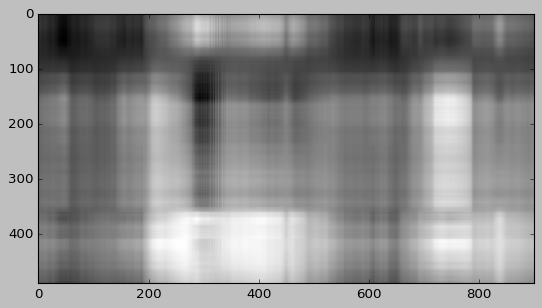

In [134]:
plt.imshow(reconstructed_imgmat, cmap='gray')

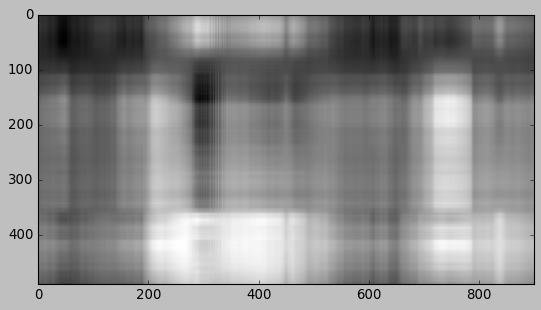

### Reconstruct the image from the first 10 principal components

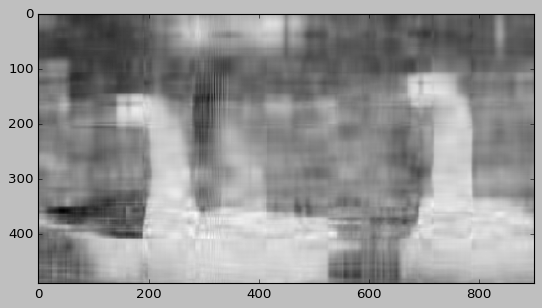

In [77]:
reconstructed_imgmat = U[:, :10] @ np.diag(D[:10]) @ Vt[:10, :]
plt.imshow(reconstructed_imgmat, cmap='gray')

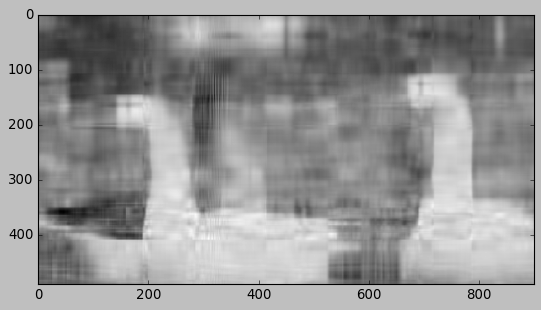

### Reconstruct the image from the first 50 principal components

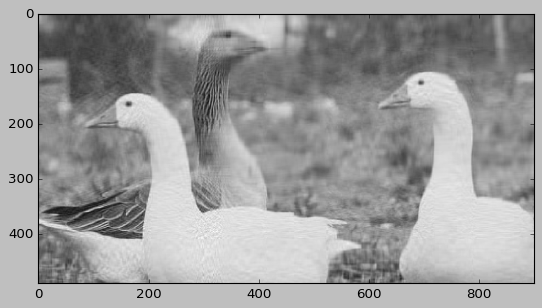

In [78]:
reconstructed_imgmat = U[:, :50] @ np.diag(D[:50]) @ Vt[:50, :]
plt.imshow(reconstructed_imgmat, cmap='gray')

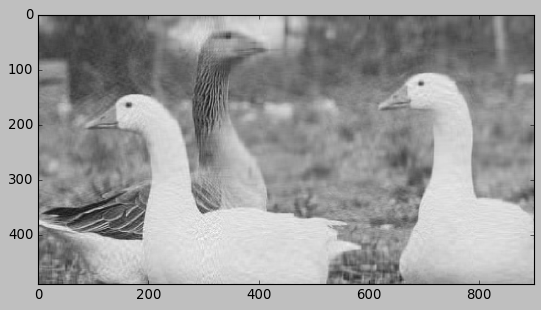

### Reconstruct the image from the first 100 principal components

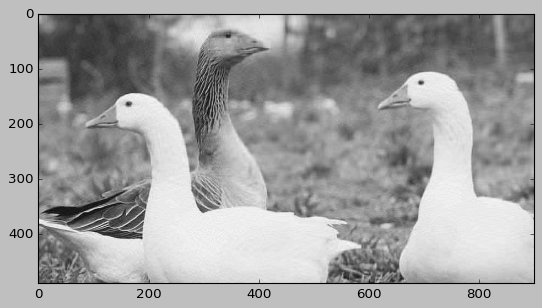

In [79]:
reconstructed_imgmat = U[:, :100] @ np.diag(D[:100]) @ Vt[:100, :]
plt.imshow(reconstructed_imgmat, cmap='gray')

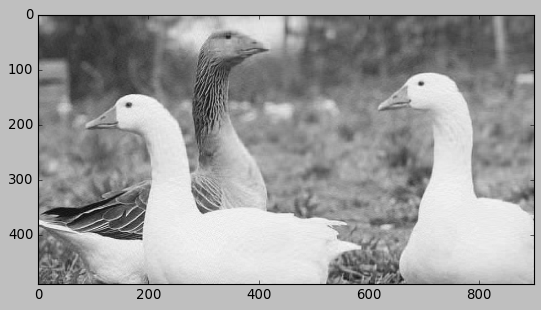

### Reconstruct the image from the first 200 principal components

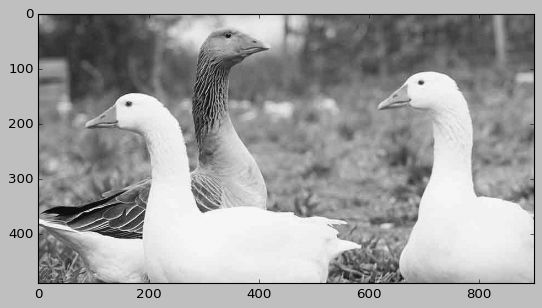

In [80]:
reconstructed_imgmat = U[:, :200] @ np.diag(D[:200]) @ Vt[:200, :]
plt.imshow(reconstructed_imgmat, cmap='gray')

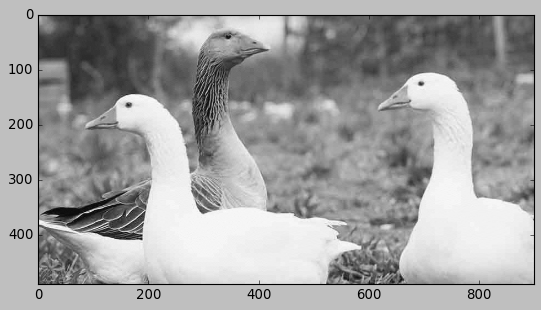

### What are the maximum number of components that you can use to reconstruct the image without loosing any information.
### Reconstruct the image using these components and compare the quality with the original image.
### Explain why did you choose this number.
### Can we use 500 principal components to reconstruct the image? Why?

In [140]:
rank = np.linalg.matrix_rank(imgmat)
rank

488

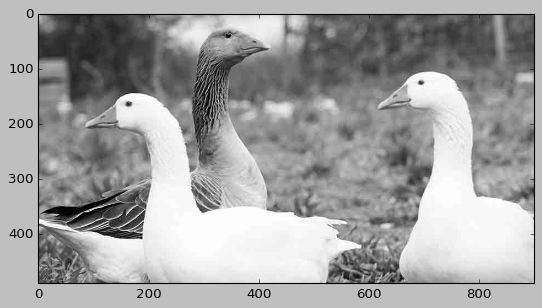

In [141]:
reconstructed_imgmat_max = U[:, :rank] @ np.diag(D[:rank]) @ Vt[:rank, :]
plt.imshow(reconstructed_imgmat_max, cmap='gray')

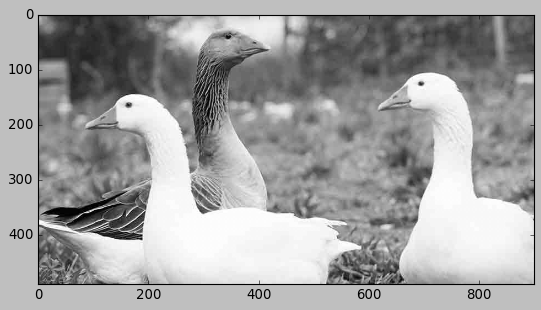

In [51]:
# Image with full number of principal components

In [132]:
reconstructed_imgmat = U[:, :500] @ np.diag(D[:500]) @ Vt[:500, :]
plt.imshow(reconstructed_imgmat, cmap='gray')

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 500 is different from 488)

In [ ]:
#size 500 is bigger than original 488

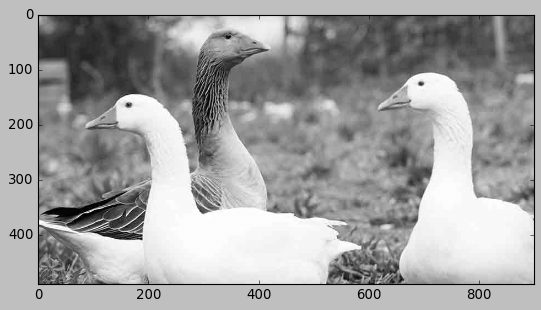

In [52]:
# Original image

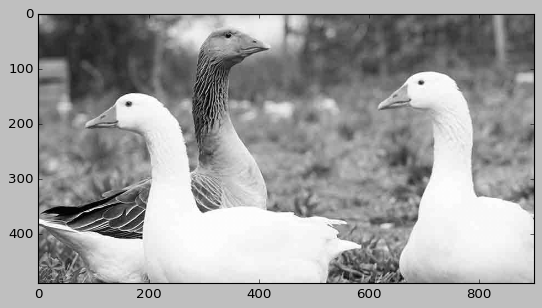

In [136]:
plt.imshow(imgmat, cmap='gray')

## PCA Practical Exercise
- In this example we will use a real data and apply PCA as a dimensionality reduction method.
- <b>Note that,</b> in the following exercise we will use the numpy linear algebra package and numpy arrays to perform our task. However, in the future you will use <b>sklearn ML library and pandas data frame</b> which are more practically used in the work environment.

### Use the following code to load your data and print out its description

In [87]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.keys())

print(cancer['DESCR'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these 

### Use the following code to save the input features into numpy array

In [88]:
Data = cancer['data']

### Check out the shape of the data matrix

In [89]:
print(Data.shape)

(569, 30)


(569, 30)

### Display a scatter plot between the first feature (first column. i.e. index 0) and the second feature (second column. i.e. index 1)  

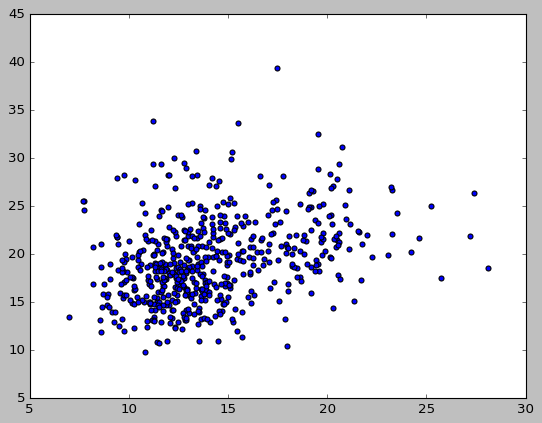

In [94]:
plt.scatter(Data[:, 0], Data[:, 1])

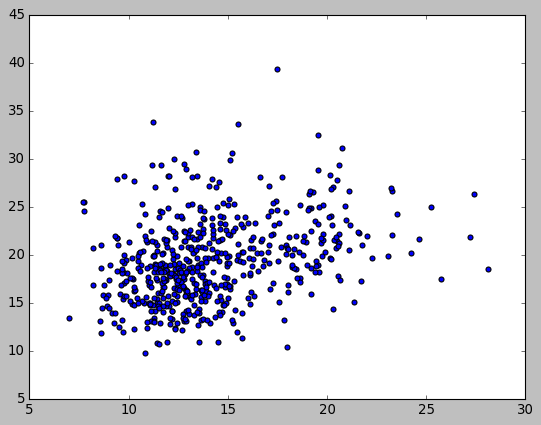

### Display a scatter plot between the first feature (first column. i.e. index 0) and the 23rd feature (23rd column. i.e. index 22)  

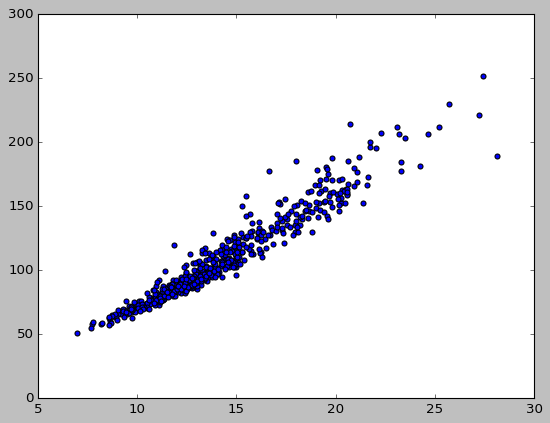

In [95]:
plt.scatter(Data[:, 0], Data[:, 22])

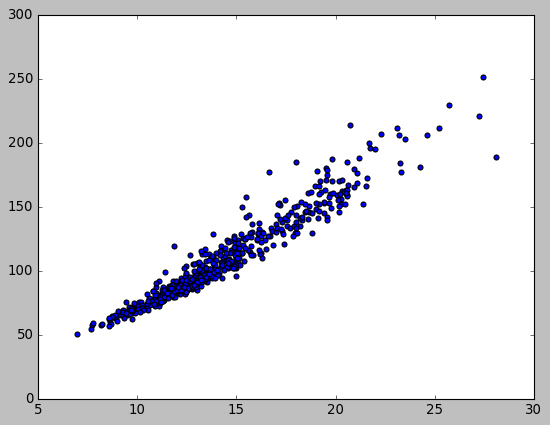

### Display a scatter plot between any other two features (columns of your chice)

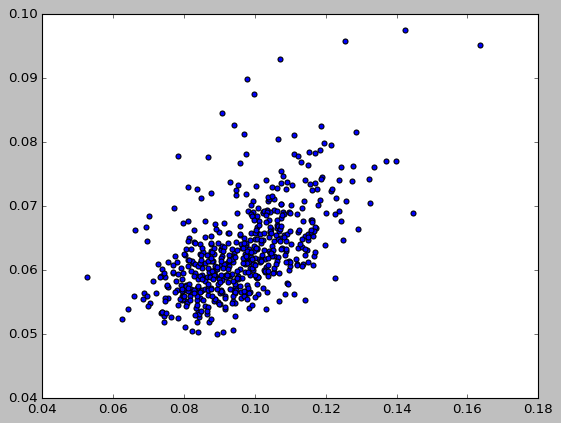

In [96]:
plt.scatter(Data[:, 4], Data[:, 9])

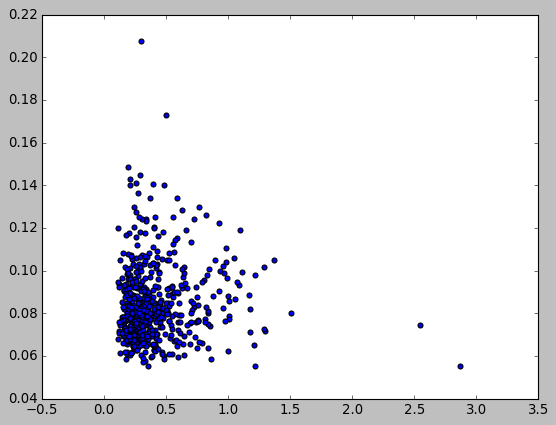

### Standrdize the data (Subtract mean and divide by standard deviation)

In [107]:
mean_vals = np.mean(Data, axis=0)
np.set_printoptions(suppress=True)
print(mean_vals)

[ 14.12729174  19.28964851  91.96903339 654.88910369   0.09636028
   0.10434098   0.08879932   0.04891915   0.18116186   0.06279761
   0.40517206   1.21685343   2.86605923  40.33707909   0.00704098
   0.02547814   0.03189372   0.01179614   0.0205423    0.0037949
  16.26918981  25.6772232  107.26121265 880.5831283    0.13236859
   0.25426504   0.27218848   0.11460622   0.29007557   0.08394582]


mean:
 [ 14.12729174  19.28964851  91.96903339 654.88910369   0.09636028
   0.10434098   0.08879932   0.04891915   0.18116186   0.06279761
   0.40517206   1.21685343   2.86605923  40.33707909   0.00704098
   0.02547814   0.03189372   0.01179614   0.0205423    0.0037949
  16.26918981  25.6772232  107.26121265 880.5831283    0.13236859
   0.25426504   0.27218848   0.11460622   0.29007557   0.08394582]

std :
 [  3.52095076   4.29725464  24.27761929 351.60475406   0.01405176
   0.05276633   0.07964973   0.03876873   0.02739018   0.00705416
   0.27706894   0.55116343   2.0200771   45.45101342   0.00299988
   0.01789244   0.03015952   0.00616486   0.0082591    0.00264374
   4.82899258   6.14085432  33.57300157 568.85645895   0.02281236
   0.15719817   0.20844087   0.06567455   0.06181308   0.01804539]

Standardized data:
[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988

In [108]:
std_vals = np.std(Data, axis=0)
print(std_vals)

[  3.52095076   4.29725464  24.27761929 351.60475406   0.01405176
   0.05276633   0.07964973   0.03876873   0.02739018   0.00705416
   0.27706894   0.55116343   2.0200771   45.45101342   0.00299988
   0.01789244   0.03015952   0.00616486   0.0082591    0.00264374
   4.82899258   6.14085432  33.57300157 568.85645895   0.02281236
   0.15719817   0.20844087   0.06567455   0.06181308   0.01804539]


In [99]:
standardized_data = (Data - mean_vals) / std_vals
print(standardized_data)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


### Find the covariance matrix of the standardized data and print its shape

In [110]:
covariance_matrix = np.cov(standardized_data, rowvar=False)
covariance_matrix.shape

(30, 30)

(30, 30)

### Find eigen values and eigen vectors of the covariance matrix and print eigen values.

In [112]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

print("Eigenvalues:")
print(eigenvalues)


Eigenvalues:
[13.30499079  5.7013746   2.82291016  1.98412752  1.65163324  1.20948224
  0.67640888  0.47745625  0.41762878  0.35131087  0.29443315  0.26162116
  0.24178242  0.15728615  0.0943007   0.0800034   0.05950361  0.05271142
  0.0495647   0.00013328  0.00075012  0.00159214  0.00691261  0.00819204
  0.01550853  0.01808679  0.02438369  0.02748771  0.03121426  0.03002566]


array([13.28160768,  5.69135461,  2.81794898,  1.98064047,  1.64873055,
        1.20735661,  0.67522011,  0.47661714,  0.41689481,  0.35069346,
        0.2939157 ,  0.26116137,  0.2413575 ,  0.15700972,  0.09413497,
        0.0798628 ,  0.05939904,  0.05261878,  0.04947759,  0.00013304,
        0.0007488 ,  0.00158934,  0.00690046,  0.00817764,  0.01548127,
        0.01805501,  0.02434084,  0.0274394 ,  0.0311594 ,  0.02997289])

### How much explained variance if we used 2,3,4,5,6 principal components?
### Can you guess the major principal components?

In [113]:
explained_variance_ratio = eigenvalues[:2] / np.sum(eigenvalues)
explained_variance_percentage = explained_variance_ratio * 100
print(f'Explained Variance { explained_variance_percentage[0]+explained_variance_percentage[1]}')

Explained Variance 63.243207651559445


Explained varinace % (2 PCs:)
63.24320765155945


In [114]:
explained_variance_ratio = eigenvalues[:3] / np.sum(eigenvalues)
explained_variance_percentage = explained_variance_ratio * 100
print(f'Explained Variance { explained_variance_percentage[0]+explained_variance_percentage[1]+explained_variance_percentage[2]}')

Explained Variance 72.63637090899084


Explained varinace % (3 PCs:)
72.63637090899086


In [116]:
explained_variance_ratio = eigenvalues[:4] / np.sum(eigenvalues)
explained_variance_percentage = explained_variance_ratio * 100
print(f'Explained Variance { explained_variance_percentage[0]+explained_variance_percentage[1]+explained_variance_percentage[2]+explained_variance_percentage[3]}')

Explained Variance 79.23850582446099


Explained varinace % (4 PCs:)
79.23850582446099


In [117]:
explained_variance_ratio = eigenvalues[:5] / np.sum(eigenvalues)
explained_variance_percentage = explained_variance_ratio * 100
print(f'Explained Variance { explained_variance_percentage[0]+explained_variance_percentage[1]+explained_variance_percentage[2]+explained_variance_percentage[3]+explained_variance_percentage[4]}')

Explained Variance 84.73427431680726


Explained varinace % (5 PCs:)
84.73427431680724


In [118]:
explained_variance_ratio = eigenvalues[:6] / np.sum(eigenvalues)
explained_variance_percentage = explained_variance_ratio * 100
print(f'Explained Variance { explained_variance_percentage[0]+explained_variance_percentage[1]+explained_variance_percentage[2]+explained_variance_percentage[3]+explained_variance_percentage[4]++explained_variance_percentage[5]}')

Explained Variance 88.75879635669061


Explained varinace % (6 PCs:)
88.75879635669058


### Use the first two PCs and transform you data (using projection)

In [119]:
first_two_pcs = eigenvectors[:, :2]
projected_data = standardized_data.dot(first_two_pcs)

### Show a scatter plot of the transformed data (Notice the graph)

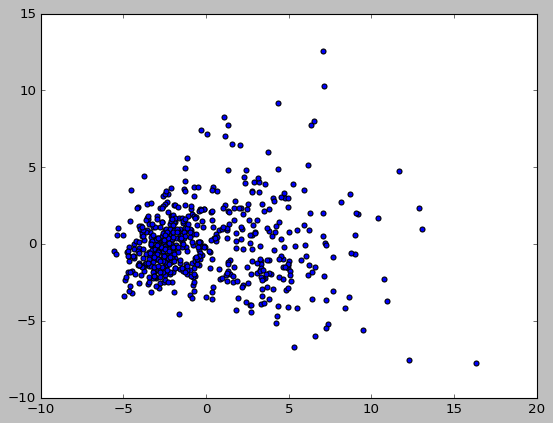

In [122]:
plt.scatter(projected_data[:, 0], projected_data[:, 1])


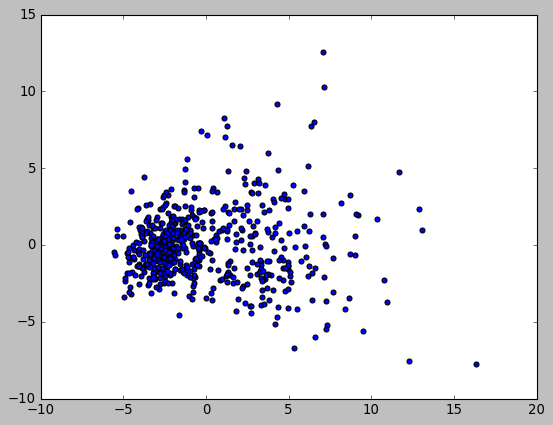

### Find the correlation and covariance matrices for the transformed data. (Notice the results)

In [127]:
correlation_matrix_transformed = np.corrcoef(projected_data, rowvar=False)
correlation_matrix_transformed

array([[ 1., -0.],
       [-0.,  1.]])

Correlation Matrix:
[[1. 0.]
 [0. 1.]]


In [126]:
covariance_matrix_transformed = np.cov(projected_data, rowvar=False)
covariance_matrix_transformed

array([[13.30499079, -0.        ],
       [-0.        ,  5.7013746 ]])

Covariance Matrix:
[[13.30499079  0.        ]
 [ 0.          5.7013746 ]]


## Congratulations 
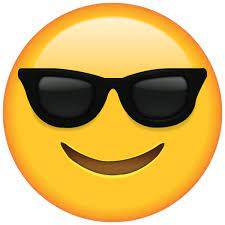

In [ ]:
#HW

In [ ]:
Using numpy eigenvector and values for [[0,1],[-2,-3]] ,[[1,0],[0,2]]

In [128]:
matrix1 = np.array([[0, 1],
                    [-2, -3]])
eigenvalues1, eigenvectors1 = np.linalg.eig(matrix1)

print("Eigenvalues")
print(eigenvalues1)
print("Eigenvectors")
print(eigenvectors1)

Eigenvalues
[-1. -2.]
Eigenvectors
[[ 0.70710678 -0.4472136 ]
 [-0.70710678  0.89442719]]


In [129]:
matrix2 = np.array([[1, 0],
                    [0, 2]])

eigenvalues2, eigenvectors2 = np.linalg.eig(matrix2)
print("Eigenvalues")
print(eigenvalues2)
print("Eigenvectors")
print(eigenvectors2)

Eigenvalues
[1. 2.]
Eigenvectors
[[1. 0.]
 [0. 1.]]
